# 	**Project TalentFlow**



*   **Sector / Contexto:** 	Recursos Humanos / People Analytics  
*   **Descripción general:** Análisis de rotación laboral y factores que inciden en la permanencia o salida de empleados.



## **Integrantes**

1. ATIENCIE SACOTO VILMA ELIZABETH
2. CABALLERO ZAMBRANO JOSÉ PATRICIO
3. MEDINA MONCAYO DANNY ROGELIO

### **1. Importación de librerías y carga de datos**

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga inicial
df_people_anlt = pd.read_csv('/content/PFDA_People_analytics.csv',sep=';')

### **2. Exploración inicial**

In [3]:
# Dimensiones del dataset
dimensiones = df_people_anlt.shape
print(f'El dataset tiene una dimensión de {dimensiones[0]} registros y un total de {dimensiones[1]} de columnas.')

El dataset tiene una dimensión de 1470 registros y un total de 36 de columnas.


In [4]:
df_people_anlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

Con respecto a los tipos de datos asociadas a las variables, a primera vista se puede observar que son los tipos de datos adecuados para cada variable, sin embargo, acorde a la necesidad e hipótesis que se vayan planteando a lo largo del análisis, estos tipos de datos pueden ir cambiando.

### **3. Evaluación de calidad de datos**

In [5]:
# Duplicados
df_people_anlt.duplicated().sum()

np.int64(0)

El dataset no muestra que existen registros o filas duplicadas.

In [6]:
# Valores faltantes
df_people_anlt.isna().sum()

,0
Unnamed: 0,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


En el caso de los valores faltantes, se identifica que solo hay dos columnas que tienen 30 filas con valores faltantes en las variables 'RelationshipSatisfaction' y 'OverTime'.

In [7]:
# Detectar outliers en columnas numéricas
num_cols = df_people_anlt.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df_people_anlt[col].quantile(0.25)
    Q3 = df_people_anlt[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df_people_anlt[(df_people_anlt[col] < lim_inf) | (df_people_anlt[col] > lim_sup)]
    print(f'{col}: {outliers.shape[0]} outliers')


Unnamed: 0: 0 outliers
Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


Para determinar los outliers se ha escogido realizar el análisis de las columnas numéricas haciendo uso del rango intercuantil (IQR). Para cada una de las variables numéricas se determinó su 1er cuartil y 3er cuartil, y así poder determinar los límites inferiores y superiores de cada una de ellas.

Con este análisis se pudo observar que, de todas las columnas del dataset, solo 10 de estas presentan valores atípicos. De manera general se puede observar que esto se muestra en variables relacionadas al ingreso mensual y la cantidad de años.

Una posible interpretación de estos outliers puede estar asociada a aquellos empleados que tienen mucho tiempo en la empresa o hayan cumplido un total de años acumulados con el mismo cargo; de manera similar con el sueldo mensual, habrán empleados que tengan un ingreso mensual muy superior a otros y esto dependerá de muchos factores, entre ellos la antiguedad en la empresa.

El impacto de estos outliers en la data, si procedemos a realizar los diferentes análisis tal y como está la data, afectará la interpretación de los resultados, ya que esto provoca sesgos y tendencias erróneas que no representan el comportamiento real de los datos en distintos escenarios. En el caso de los ingresos mensuales, el hecho de que alguien gané mucho más y los demás no, al calcular las medidas de tendencia central, esta mostrará un valor erróneo que estará alejado de la realidad, principalmente en la media. De manera similar se puede presentar este escenario en el caso de los años.

### **4. Análisis de distribución de variables**

In [8]:
# Distribución y principales medidas de tendencia central
variables = ["Age","Attrition","BusinessTravel","Department","DistanceFromHome","Education","EducationField","EnvironmentSatisfaction","Gender",
             "JobLevel","JobRole","MaritalStatus","MonthlyIncome","NumCompaniesWorked","OverTime","TotalWorkingYears","YearsAtCompany",
             "YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]
df_people_anlt_main = df_people_anlt[variables]

df_people_anlt_main.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.063946,6502.931293,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,1.106940,4707.956783,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2911.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,4919.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,8379.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,5.000000,19999.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000


De todas las variables principales que fueron seleccionadas para el análisis, se puede observar que 'MonthlyIncome' es la que tiene la desviación estándar muy elevada en comparación con las demás variables. Esto se debe justamente a lo mencionado en el apartado de los outliers, como hay salarios muy por mayor de la media esto crea un sesgo y tienda a dar una interpretación errónea dando a entender que el salario promedio ronda los $6502 cuando en realidad este valor se ve afectado, ya que considera aquellos salarios supremamente elevados que hacen creer que en realidad ese es el valor promedio del salario por empleado.

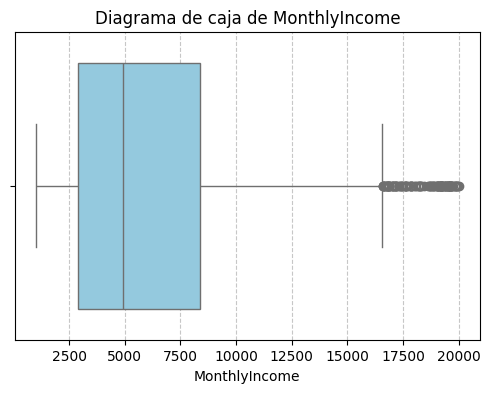

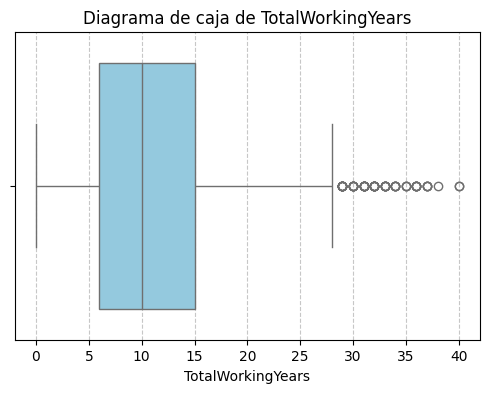

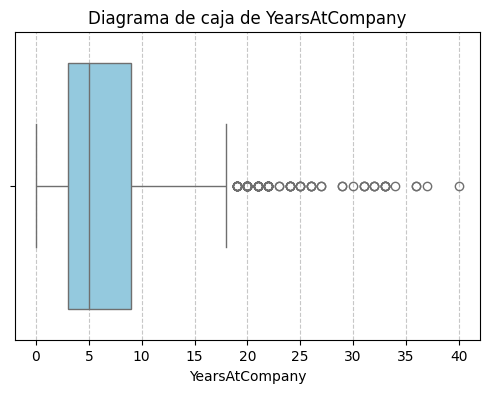

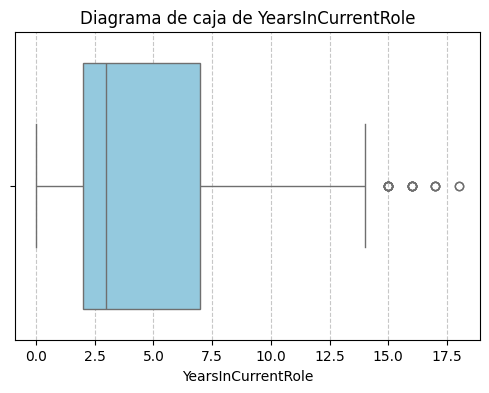

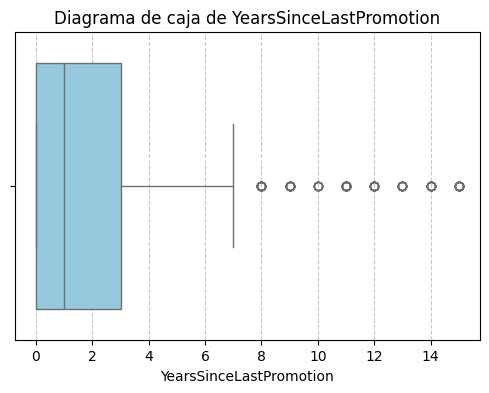

In [9]:
# Gráficos
variables_graficos = ["MonthlyIncome","TotalWorkingYears","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion"]
for var in variables_graficos:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_people_anlt_main[var], color='skyblue')
    plt.title(f'Diagrama de caja de {var}', fontsize=12)
    plt.xlabel(var)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


1. **MonthlyIncome**

La mediana del ingreso se ubica cerca de la parte baja del rango, lo que indica que la mayoría de empleados gana menos que el promedio general.

Existen múltiples outliers hacia la derecha (ingresos altos), correspondientes a cargos ejecutivos

Esta diferencia salarial puede influir en la percepción de equidad interna: los empleados en la parte baja del rango podrían tener mayor propensión a rotar si no perciben oportunidades de mejora económica.

2. **TotalWorkingYears**

La mayoría de empleados tiene entre 5 y 15 años de experiencia, pero se observan casos extremos con más de 30 o 40 años (outliers).

Esto refleja una plantilla con perfiles mixtos: empleados jóvenes en desarrollo y veteranos consolidados.

Los más experimentados suelen tener mayor estabilidad, mientras que quienes tienen menos años podrían estar en etapas de búsqueda y cambio laboral, lo que aumenta el riesgo de rotación temprana.

3. **YearsAtCompany**

La mediana es baja (alrededor de 5 años) y hay varios outliers con más de 20 años.

Esto indica que la mayoría del personal no tiene una antigüedad alta, lo cual puede asociarse a alta movilidad o crecimiento limitado dentro de la organización.

Los empleados que superan los 10 años suelen representar casos de retención exitosa o lealtad organizacional.

4. **YearsInCurrentRole**

La mayoría lleva entre 2 y 6 años en su posición, pero algunos empleados permanecen más de 15 años sin cambio (outliers).

Este patrón sugiere que no todos los colaboradores experimentan movilidad interna o promociones frecuentes.

La falta de rotación en el cargo puede derivar en estancamiento profesional, un factor común en la pérdida de compromiso y salida voluntaria.

5. **YearsSinceLastPromotion**

La mayoría no ha sido promovida en los últimos 2–3 años, mientras que hay varios casos con más de 8 años sin ascenso (outliers).

Esto puede interpretarse como un riesgo potencial de desmotivación o rotación voluntaria, ya que la falta de crecimiento percibido suele asociarse a renuncias.

En contraste, quienes fueron promovidos recientemente tienden a mostrar mayor compromiso y retención.

## **5. Propuesta de análisis**

### **¿Qué tanto influye el Reconocimiento a la permanencia o salida de empleados?**

Con base a la interrogante planteada se realizará un análisis exploratorio de datos donde se determinarán hallazgos interesanes que permitan explicar el comportamiento de salida o permanencia de los empleados.

In [10]:
# Variables de interes
var_interes = ['Age', 'Attrition','Department','Education','EducationField','Gender','JobLevel','JobRole','MonthlyIncome',
               'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion']
df_people_anlt_main_var=df_people_anlt[var_interes]
df_people_anlt_main_var.head()

,Age,Attrition,Department,Education,EducationField,Gender,JobLevel,JobRole,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Sales,2,Life Sciences,Female,2,Sales Executive,5993,6,4,0
1,49,No,Research & Development,1,Life Sciences,Male,2,Research Scientist,5130,10,7,1
2,37,Yes,Research & Development,2,Other,Male,1,Laboratory Technician,2090,0,0,0
3,33,No,Research & Development,4,Life Sciences,Female,1,Research Scientist,2909,8,7,3
4,27,No,Research & Development,1,Medical,Male,1,Laboratory Technician,3468,2,2,2


Para este análisis se han considerado 12 columnas o variables finales que aportan valor a la propuesta de análisis mencionada. Lo que se busca es encontrar alguna relación que exista entre empleados del mismo departamento o, de manera general, con perfiles similares o iguales que se hayan quedado y otros ido de la empresa e interpretar cuál es sería una posible motivación para permanecer o irse de la empresa.

### **5.1 Exploración de estado inicial de la propuesta**

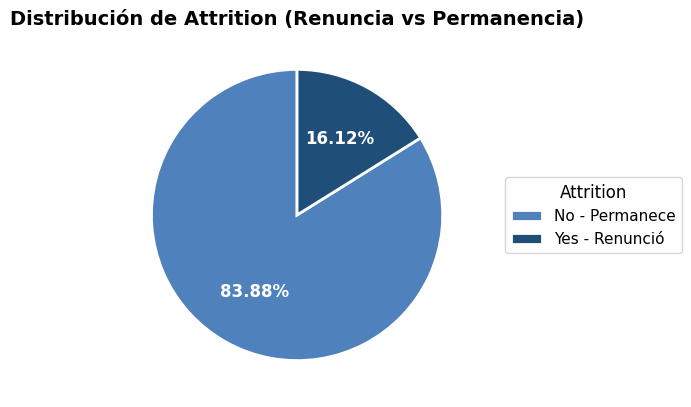

In [11]:
#Cantidad de personas que permanecen vs personas que se van
cant_personas = df_people_anlt_main_var.groupby('Attrition')['Department'].count().reset_index(name='Total_personas')
cant_personas['Porcentaje'] = ((cant_personas['Total_personas'] / cant_personas['Total_personas'].sum()) * 100).round(2)
cant_personas['Etiqueta'] = cant_personas['Attrition'].replace({
    'Yes': 'Yes - Renunció',
    'No' : 'No - Permanece'
})

colores = ['#4F81BD', '#1F4E79']

plt.figure(figsize=(6,6))

patches, texts, autotexts = plt.pie(
    cant_personas['Porcentaje'],
    autopct='%.2f%%',
    startangle=90,
    colors=colores,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

plt.legend(
    patches,
    cant_personas['Etiqueta'],
    title="Attrition",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=11,
    title_fontsize=12
)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

plt.title('Distribución de Attrition (Renuncia vs Permanencia)', fontsize=14, fontweight='bold', loc='center')
plt.tight_layout()
plt.show()


De manera general se puede observar que el porcentaje de empleados que se queda es muy superior al que se va, lo que se podría interpretar como un porcentaje leve-medio de perdida de empleados. Sin embargo, no se puede no darle importancia a ese 16.12%, ya que si ese comportamiento sigue aumentando podría llegar a un 20% o más, lo que representaría que la quinta parte de los empleados tienden a renunciar a la empresa, lo cuál representaría que es un indicador para nada atractivo y plantearía la incógnita de ¿qué está pasando? a la empresa.

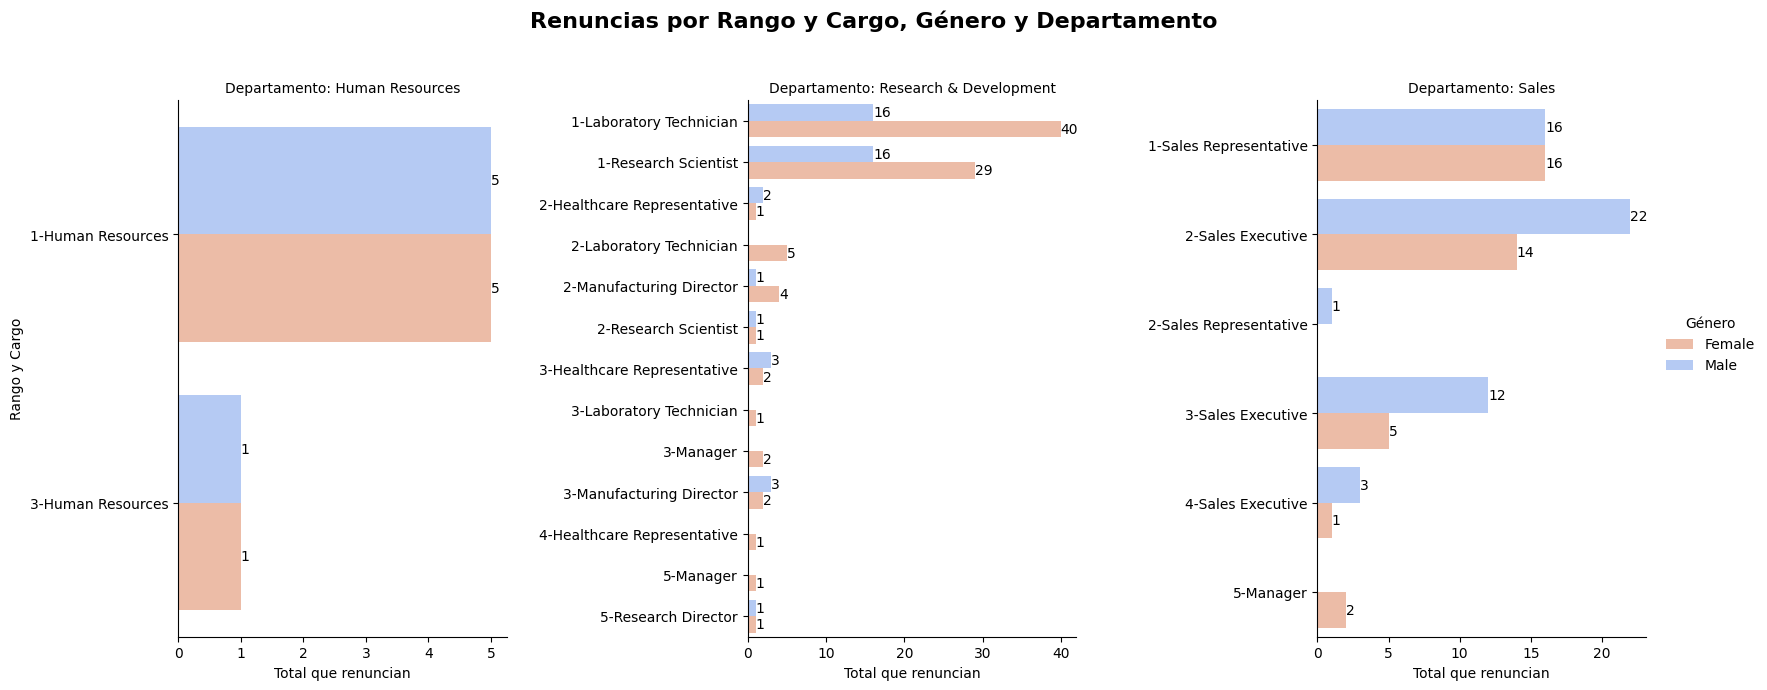

In [25]:
# Cantidad de personas que se van por 'Department', 'Gender', 'JobLevel', 'JobRole'
agrupado_personas = df_people_anlt_main_var[df_people_anlt_main_var['Attrition']=='Yes'] \
.groupby(['Department','Gender','JobLevel','JobRole']).size().reset_index(name='Total_personas')

agrupado_personas['rango_rol'] = agrupado_personas['JobLevel'].astype(str).str.cat(agrupado_personas['JobRole'], sep='-')
agrupado_personas = agrupado_personas.drop(columns=['JobLevel','JobRole'])
df_grouped_sorted = agrupado_personas.sort_values('rango_rol', ascending=True)
g = sns.FacetGrid(
    df_grouped_sorted,
    col="Department",
    sharey=False,
    sharex=False,
    height=7,
    aspect=0.8
)

def barplot_with_labels(data, **kws):
    ax = sns.barplot(
        data=data,
        x="Total_personas",
        y="rango_rol",
        hue="Gender",
        palette="coolwarm"
    )
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", fontsize=10)

    return ax

g.map_dataframe(barplot_with_labels)

g.add_legend(title="Género")
g.set_axis_labels("Total que renuncian", "Rango y Cargo")
g.set_titles(col_template="Departamento: {col_name}")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Renuncias por Rango y Cargo, Género y Departamento",
               fontsize=16, fontweight='bold')

plt.show()

A nivel macro esta imagen da hallazgos muy interesantes:
1. Se puede notar que las personas que renuncian provienen de 3 departamentos de la empresa.
2. Los rangos de cada departamento se asocian a las actividades que cada cargo posee, que van desde las más esenciales hasta aquellos rangos ejecutivos. Dicho esto, los rangos nivel 1 y 2 comprenden cargos operativos, técnicos y/o iniciales, rangos nivel 3 y 4 son para cargos medios, seniors, asociados y/o gerentes y rango 5 están asociados cargos directivos, altos ejecutivos, gerentes generales, entre otros.
3. En dos de los tres departamentos se observa una tendencia de renuncia por género. En Sales se puede notar que existe una tendencia en donde los hombres son los que suelen renunciar más a sus cargos, por otro lado, en research & development, la tendencia de renuncia es sumamente clara por parte de las mujeres. El total de mujeres que renuncia es muy superior que el de hombres. En el caso de Human Resources, no presenta ninguna tendencia, ya que tanto hombres como mujeres renuncian de manera equitativa.
4. Existen cargos donde hay renuncias que solo tienen asociadas a un solo género.
5. De manera general, en ambos departamentos donde se aprecia una tendencia de renuncia, se observa que los rangos que presentan mayor índice de renuncia son los rangos 1 y 2.


## **5.2 Análisis de variables objetivos**

Teniendo la premisa de los hallazgos descubiertos en la parte previa, se conoce que la gran mayoría de personas que renuncian se centran en los rangos 1 y 2, por lo que se realizará un análisis con estos rangos y sus cargos asociados de aquellas personas que tengan características similares (Rango, cargo, género, departamento) que no hayan renunciado y obtener información relevante.

In [42]:
df_people_anlt_main_var_filter_R = df_people_anlt_main_var[(df_people_anlt_main_var['JobLevel'].isin([1,2]))&(df_people_anlt_main_var['Attrition']=='Yes')]
df_people_anlt_main_var_filter_R['rango_rol'] = df_people_anlt_main_var_filter_R['JobLevel'].astype(str).str.cat(df_people_anlt_main_var_filter_R['JobRole'], sep='-')
df_people_anlt_main_var_filter_R = df_people_anlt_main_var_filter_R.drop(columns=['JobLevel','JobRole'])
df_people_anlt_main_var_filter_NR = df_people_anlt_main_var[(df_people_anlt_main_var['JobLevel'].isin([1,2]))&(df_people_anlt_main_var['Attrition']=='No')]
df_people_anlt_main_var_filter_NR['rango_rol'] = df_people_anlt_main_var_filter_NR['JobLevel'].astype(str).str.cat(df_people_anlt_main_var_filter_NR['JobRole'], sep='-')
df_people_anlt_main_var_filter_NR = df_people_anlt_main_var_filter_NR.drop(columns=['JobLevel','JobRole'])

/tmp/ipython-input-2891537194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_people_anlt_main_var_filter_R['rango_rol'] = df_people_anlt_main_var_filter_R['JobLevel'].astype(str).str.cat(df_people_anlt_main_var_filter_R['JobRole'], sep='-')
/tmp/ipython-input-2891537194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_people_anlt_main_var_filter_NR['rango_rol'] = df_people_anlt_main_var_filter_NR['JobLevel'].astype(str).str.cat(df_people_anlt_main_var_filter_NR['JobRole'], sep='-')


In [74]:
promedios_R = df_people_anlt_main_var_filter_R.groupby(['Department','Gender','rango_rol','Attrition']).agg(
    Edad_Promedio=('Age', 'mean'),
    Ingreso_Promedio=('MonthlyIncome', 'mean'),
    Antiguedad_Promedio=('YearsAtCompany', 'mean'),
    RolAnios_Promedio=('YearsInCurrentRole', 'mean'),
    UltimoAscenso_Promedio=('YearsSinceLastPromotion', 'mean')
).round(2).reset_index()

lista_rango_rol = list((promedios_R['Department'].str.cat(promedios_R['Gender'], sep='-').str.cat(promedios_R['rango_rol'], sep='-')).unique())

In [75]:
promedios_NR = df_people_anlt_main_var_filter_NR.groupby(['Department','Gender','rango_rol','Attrition']).agg(
    Edad_Promedio=('Age', 'mean'),
    Ingreso_Promedio=('MonthlyIncome', 'mean'),
    Antiguedad_Promedio=('YearsAtCompany', 'mean'),
    RolAnios_Promedio=('YearsInCurrentRole', 'mean'),
    UltimoAscenso_Promedio=('YearsSinceLastPromotion', 'mean')
).round(2).reset_index()
promedios_NR['Clave'] = promedios_NR['Department'].str.cat(promedios_NR['Gender'], sep='-').str.cat(promedios_NR['rango_rol'], sep='-')
promedios_NR = promedios_NR[promedios_NR['Clave'].isin(lista_rango_rol)].drop(columns=['Clave'])

promedios = pd.concat([promedios_R, promedios_NR], ignore_index=True)

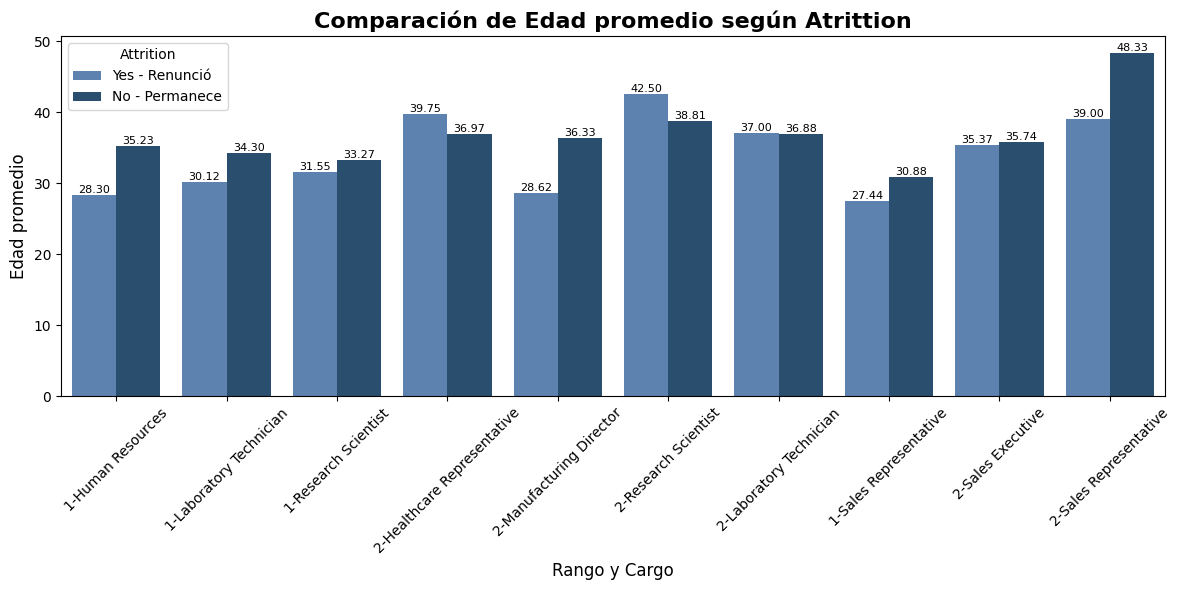

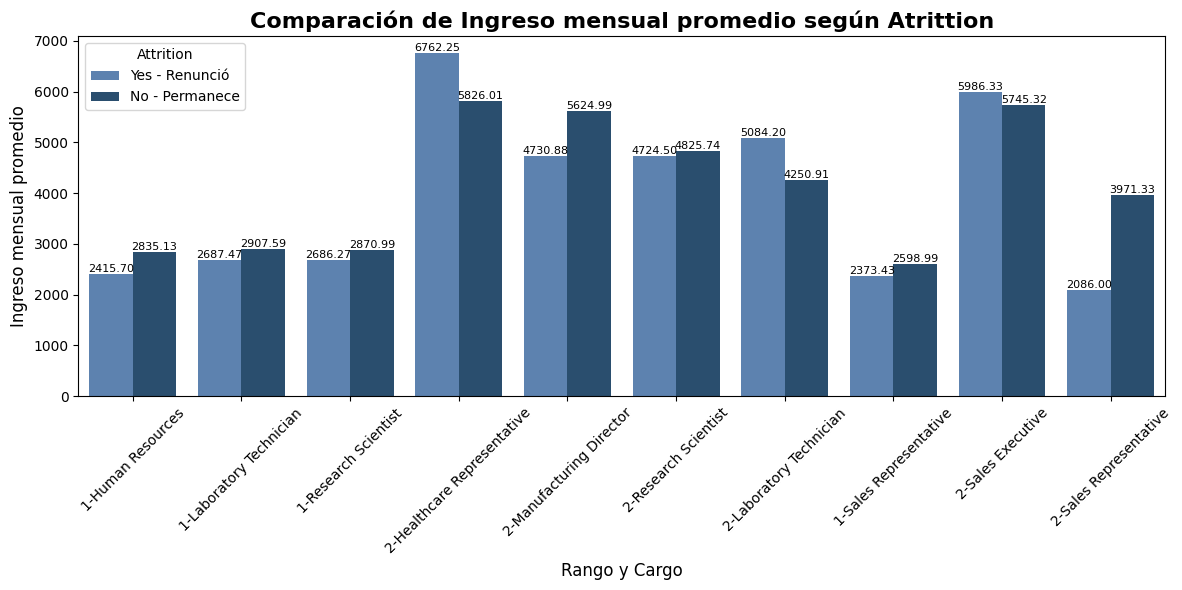

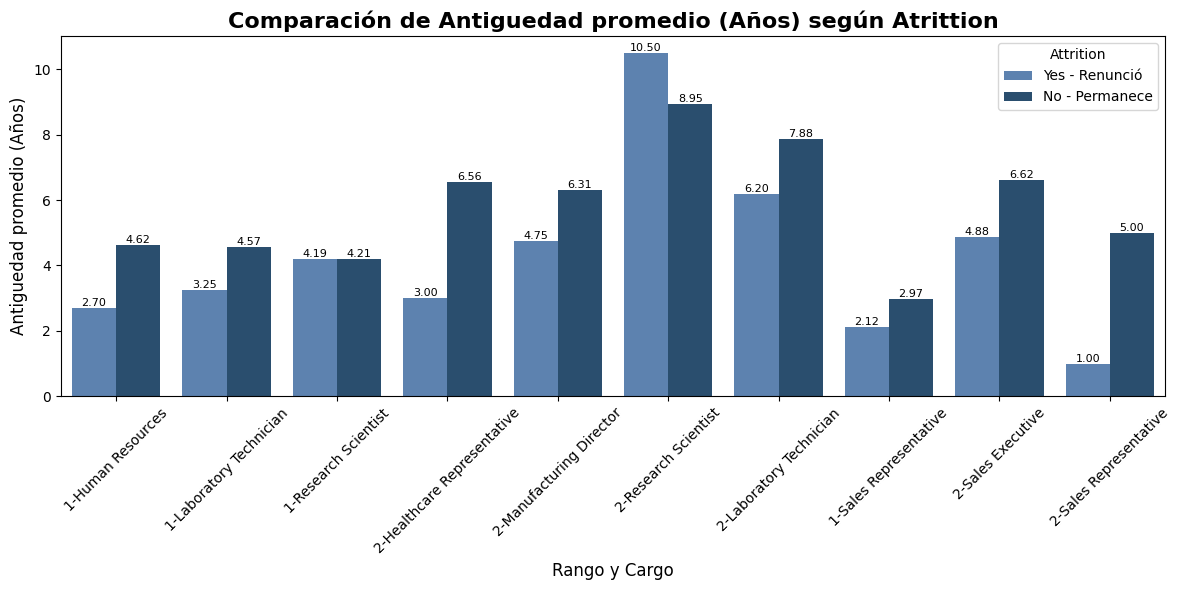

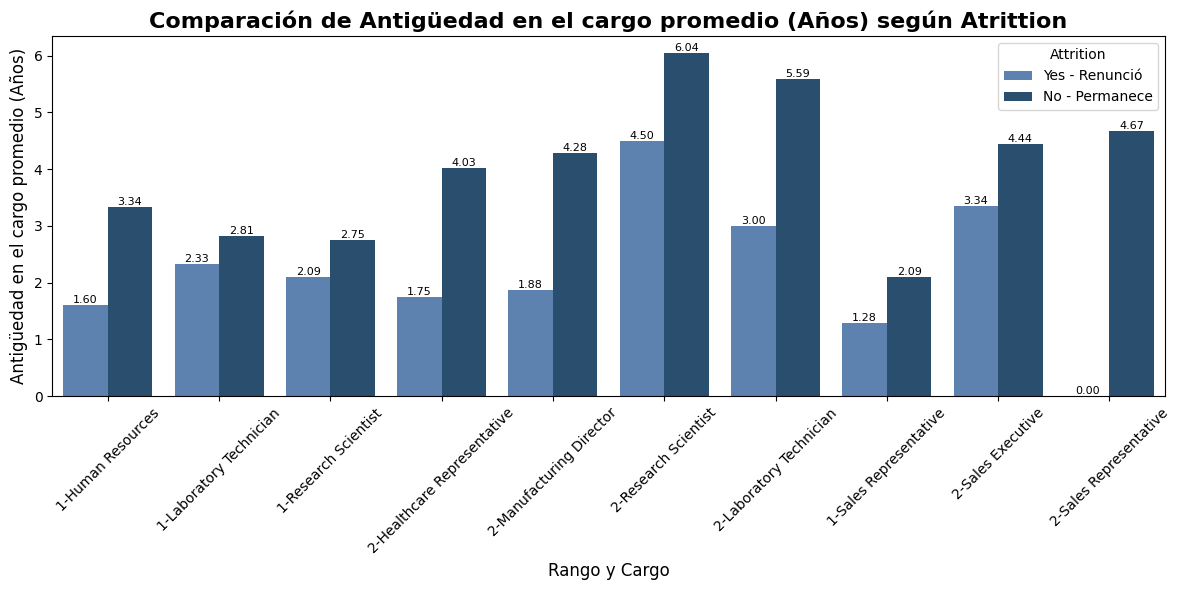

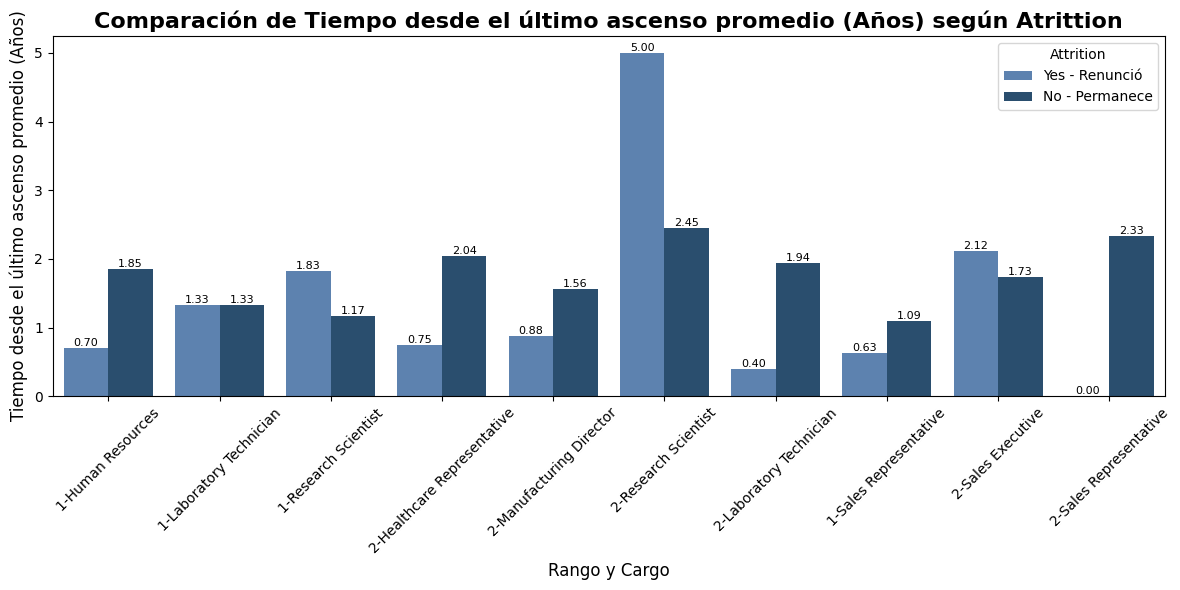

In [113]:
# Variables objetivo
variables_objetivo = [
    'Edad_Promedio',
    'Ingreso_Promedio',
    'Antiguedad_Promedio',
    'RolAnios_Promedio',
    'UltimoAscenso_Promedio'
]

dicc = {
    'Edad_Promedio': 'Edad promedio',
    'Ingreso_Promedio': 'Ingreso mensual promedio',
    'Antiguedad_Promedio': 'Antiguedad promedio (Años)',
    'RolAnios_Promedio': 'Antigüedad en el cargo promedio (Años)',
    'UltimoAscenso_Promedio': 'Tiempo desde el último ascenso promedio (Años)'
}

df_comp = promedios.melt(
    id_vars=['Department', 'Gender', 'rango_rol', 'Attrition'],
    value_vars=variables,
    var_name='Variable',
    value_name='Promedio'
)

df_comp['Attrition'] = df_comp['Attrition'].replace({
    'Yes': 'Yes - Renunció',
    'No' : 'No - Permanece'
})

for var in variables_objetivo:

    df_var = df_comp[df_comp['Variable'] == var]

    plt.figure(figsize=(12,6))

    sns.barplot(
        data=df_var,
        x="rango_rol",
        y="Promedio",
        hue="Attrition",
        palette=["#4F81BD", "#1F4E79"],
        dodge=True,
        errorbar=None
    )

    plt.title(f"Comparación de {dicc[var]} según Atrittion", fontsize=16, fontweight="bold")
    plt.xlabel("Rango y Cargo", fontsize=12)
    plt.ylabel(f"{dicc[var]}", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Attrition")

    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=8)

    plt.tight_layout()
    plt.show()


1. **Edad Promedio**

En la mayoría de los cargos, quienes renuncian tienen una edad promedio menor que quienes permanecen.

La renuncia se concentra en perfiles jóvenes y de menor trayectoria, especialmente en roles operativos.

Los empleados de mayor edad muestran mayor estabilidad laboral, reduciendo su probabilidad de renuncia.

2. **Ingreso mensual promedio**

En la mayoría de roles, el ingreso de quienes renuncian es similar o ligeramente inferior, descartando el salario como causa general de salida.

En ventas operativas, quienes renuncian presentan ingresos notablemente más bajos, evidenciando riesgo salarial específico.

En roles especializados como “Healthcare Representative”, quienes renuncian tienen sueldos más altos, lo que apunta a rotación por factores externos del mercado.

3. **Antigüedad total promedio**

Los colaboradores que renuncian tienen menos años totales en la empresa, confirmando que la fuga ocurre en etapas iniciales.

En roles operativos y comerciales, la brecha entre quienes renuncian y quienes permanecen es superior a los 3 años.

Al aumentar la antigüedad, la tasa de renuncia disminuye, indicando una relación directa entre estabilidad y permanencia.

4. **Antigüedad en el cargo promedio**

La renuncia es mayor entre empleados con poca antigüedad en su posición, reflejando rotación temprana.

En todos los roles y niveles, quienes permanecen muestran mayor consolidación en el puesto, evidenciando relación entre experiencia y permanencia.

Los cargos de nivel 2 presentan las mayores brechas, lo que indica posibles desafíos en retención en posiciones intermedias.

5. **Tiempo desde el último ascenso promedio**

En la mayoría de los roles, quienes renunciaron acumulaban menos tiempo desde su último ascenso, por lo que la fuga ocurre antes del estancamiento.

En cargos técnicos y administrativos se observa una brecha constante, con mayor estabilidad en quienes permanecen.

El rol “2-Research Scientist” destaca con un pico atípico de 5 años sin ascenso, lo que sugiere riesgo de estancamiento en puestos especializados.